# PREDICT HEART DISEASE

#### Attribute Information:
1. sex : 1 = male; 0 = female
2. cp: value 1: typical angina; value 2: atypical angina; value 3:non-anginal pain; value 4: asymptomatic
3. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
4. fbs: fasting blood sugar > 120 mg/dl; (1 = true; 0 = false)
5. restecg: resting electrocardiographic results 
Value 0: normal 
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo (month of exercise ECG reading)
6. thalach: maximum heart rate achieved
7. exang: exercise induced angina (1 = yes; 0 = no) 
8. oldpeak: ST depression induced by exercise relative to rest
9. slope: the slope of the peak exercise ST segment 
Value 1: upsloping 
Value 2: flat 
Value 3: downsloping
9. ca: number of major vessels (0-3) colored by flourosopy
10. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
11. num: diagnosis of heart disease (angiographic disease status) 
Value 0: < 50% diameter narrowing 
Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)
12. chol: serum cholestoral in mg/dl 

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


### 1. Data Exploration

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/dataset_2190_cholesterol.csv')
df.head(10)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
5,56,1,2,120,0,0,178,0,0.8,1,0,3,0,236
6,62,0,4,140,0,2,160,0,3.6,3,2,3,3,268
7,57,0,4,120,0,0,163,1,0.6,1,0,3,0,354
8,63,1,4,130,0,2,147,0,1.4,2,1,7,2,254
9,53,1,4,140,1,2,155,1,3.1,3,0,7,1,203


In [3]:
df.describe(include="all")

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN,NaN
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
chol          int64
dtype: object

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
chol        0
dtype: int64

In [7]:
df.corr()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
age,1.000000,-0.097542,0.104139,0.284946,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853,0.208950
sex,-0.097542,1.000000,0.010084,-0.064456,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469,-0.199915
cp,0.104139,0.010084,1.000000,-0.036077,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075,0.072319
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754,0.130120
fbs,0.118530,0.047862,-0.039975,0.175340,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186,0.009841
restecg,0.148868,0.021647,0.067505,0.146560,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696,0.171043
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040,-0.003432
exang,0.091661,0.146201,0.384060,0.064762,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057,0.061310
oldpeak,0.203805,0.102173,0.202277,0.189171,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092,0.046564
slope,0.161770,0.037533,0.152050,0.117382,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.377957,-0.004062


In [8]:
temp = df.corr()['chol']
temp[abs(temp >= 0.1)]

age         0.208950
trestbps    0.130120
restecg     0.171043
chol        1.000000
Name: chol, dtype: float64

<AxesSubplot:xlabel='age', ylabel='chol'>

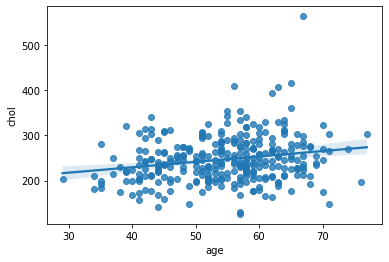

In [9]:
sns.regplot(x="age", y="chol",data = df)

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

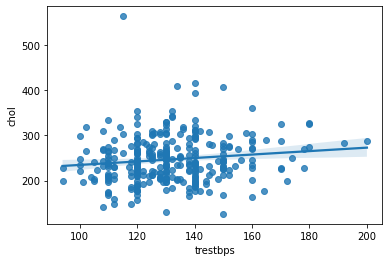

In [10]:
sns.regplot(x="trestbps", y="chol",data = df)

### 2. Linear Regression

In [11]:
feature_cols = ["age","trestbps","restecg"]
x = df[feature_cols].values
y = df["chol"].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
lin_reg.score(x,y)

0.0641318623819166

In [15]:
X_test = np.array([62, 140, 2]).reshape(1, -1)

In [16]:
y_pred = lin_reg.predict(X_test)
y_pred

array([261.2995283])

### 3. Logistic Regression

Text(0, 0.5, 'count')

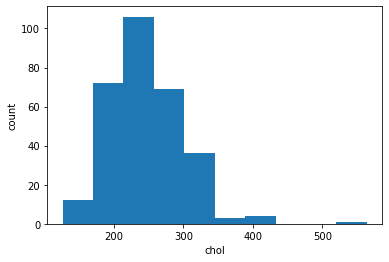

In [17]:
plt.hist(df["chol"])
plt.xlabel("chol")
plt.ylabel("count")

In [18]:
chol_group = np.linspace(min(df["chol"]),max(df["chol"]),3)
chol_group

array([126., 345., 564.])

In [19]:
chol_name = ['Normal','High']
df['chol_groups'] = df['chol'] > 200
df['chol_groups'].replace(True, 'High', inplace = True)
df['chol_groups'].replace(False, 'Low', inplace = True)

In [20]:
# df['chol_groups'] = pd.cut(df['chol'],chol_group,labels = chol_name,include_lowest = True)
df[['chol','chol_groups']].head(10)

,chol,chol_groups
0,233,High
1,286,High
2,229,High
3,250,High
4,204,High
5,236,High
6,268,High
7,354,High
8,254,High
9,203,High


In [21]:
df.head(10)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol,chol_groups
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,High
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,High
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,High
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,High
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,High
5,56,1,2,120,0,0,178,0,0.8,1,0,3,0,236,High
6,62,0,4,140,0,2,160,0,3.6,3,2,3,3,268,High
7,57,0,4,120,0,0,163,1,0.6,1,0,3,0,354,High
8,63,1,4,130,0,2,147,0,1.4,2,1,7,2,254,High
9,53,1,4,140,1,2,155,1,3.1,3,0,7,1,203,High


In [22]:
df['chol_groups']= df['chol_groups'].astype(object)

In [23]:
df.dtypes

age              int64
sex              int64
cp               int64
trestbps         int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca              object
thal            object
num              int64
chol             int64
chol_groups     object
dtype: object

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [25]:
le = preprocessing.LabelEncoder()

In [26]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [27]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [28]:
df.head(10)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol,chol_groups
0,63,1,1,145,1,2,150,0,2.3,3,0,1,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,0,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,2,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,0,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,0,0,204,0
5,56,1,2,120,0,0,178,0,0.8,1,0,0,0,236,0
6,62,0,4,140,0,2,160,0,3.6,3,2,0,3,268,0
7,57,0,4,120,0,0,163,1,0.6,1,0,0,0,354,0
8,63,1,4,130,0,2,147,0,1.4,2,1,2,2,254,0
9,53,1,4,140,1,2,155,1,3.1,3,0,2,1,203,0


In [29]:
features=["age","trestbps","restecg"]
x = df[features].values
y = df["chol_groups"].values
df["chol_groups"].value_counts()

0    253
1     50
Name: chol_groups, dtype: int64

In [30]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = logreg.fit(X_train,y_train)

In [33]:
lr.score(X_test, y_test)

0.881578947368421

In [34]:
#X_test = np.array([23,14,0]).reshape(1,-1)
y_pred=logreg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


#### So sánh với mô hình Naives Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.881578947368421

#### Trong trường hợp này thuật toán NBG có kết quả tương tự Logistic Regression